# EDA

Importamos librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Leemos el archivo CSV resultante del ETL

In [2]:
df = pd.read_csv(r'hechosyvictimas.csv')
df.head(5)


,ID,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha_Fallecimiento,...,Latitud,Participantes,Acusado,Año_Fallecimiento,Mes_Fallecimiento,Dia_Fallecimiento,Rol_Map,Victima_Map,Sexo_Map,Acusado_Map
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,...,-34.687570,MOTO-AUTO,AUTO,2016,1,1,1,1,1,3
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,...,-34.669777,AUTO-PASAJEROS,PASAJEROS,2016,1,2,1,3,1,6
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,...,-34.631894,MOTO-AUTO,AUTO,2016,1,3,1,1,1,3
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,2016-01-10,...,-34.680930,MOTO-SD,AUTO,2016,1,10,1,1,1,3
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,...,-34.622466,MOTO-PASAJEROS,PASAJEROS,2016,2,1,1,1,1,6


### En el ETL (Notebook adjunto en el trabajo) nos encargamos de hacer la limpieza de los datos y la imputación de valores faltantes, en el EDA en el sentido estricto de la palabra comenzaremos con la etapa de exploración inicial

## Exploración inicial

Vistazo a los tipos de datos, nulos y cantidad de registros

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     717 non-null    object 
 1   Fecha                  717 non-null    object 
 2   Año                    717 non-null    int64  
 3   Mes                    717 non-null    int64  
 4   Dia                    717 non-null    int64  
 5   Rol                    717 non-null    object 
 6   Victima                717 non-null    object 
 7   Sexo                   717 non-null    object 
 8   Edad                   717 non-null    int64  
 9   Fecha_Fallecimiento    717 non-null    object 
 10  Numero_Victimas        717 non-null    int64  
 11  Franja_Horaria         717 non-null    int64  
 12  Lugar_Del_Hecho        717 non-null    object 
 13  Tipo_de_Calle          717 non-null    object 
 14  Dirección_Normalizada  708 non-null    object 
 15  Comuna

Podemos observar que luego de la limpieza de datos e imputación, la dirección normalizada, latitud y longitud son las únicas columnas con datos faltantes, sin embargo, son mínimos frente al total de la muestra pues representan el 0.2% del mismo. Dado que no queremos afectar otras variables, no haremos ninguna modificación en las mismas. 

### Estadisticas descriptivas

In [4]:
df.describe()

,Año,Mes,Dia,Edad,Numero_Victimas,Franja_Horaria,Comuna,Longitud,Latitud,Año_Fallecimiento,Mes_Fallecimiento,Dia_Fallecimiento,Rol_Map,Victima_Map,Sexo_Map,Acusado_Map
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,704.000000,704.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948,42.175732,1.061367,11.548117,7.430962,-58.441664,-34.619700,2018.181311,6.649930,15.768480,1.716876,1.854951,1.231520,4.690377
std,1.672655,3.575140,8.683358,19.080243,0.257024,6.697535,4.385067,0.046397,0.035292,1.678998,3.561733,8.689842,0.818370,1.006206,0.422098,2.059609
min,2016.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-58.529942,-34.705250,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2017.000000,4.000000,9.000000,28.000000,1.000000,6.000000,4.000000,-58.476556,-34.643918,2017.000000,3.000000,9.000000,1.000000,1.000000,1.000000,3.000000
50%,2018.000000,7.000000,16.000000,39.000000,1.000000,11.000000,8.000000,-58.444513,-34.622866,2018.000000,7.000000,16.000000,2.000000,2.000000,1.000000,5.000000
75%,2019.000000,10.000000,23.000000,55.000000,1.000000,17.000000,11.000000,-58.401841,-34.597013,2019.000000,10.000000,23.000000,2.000000,2.000000,1.000000,6.000000
max,2021.000000,12.000000,31.000000,95.000000,3.000000,23.000000,15.000000,-58.356082,-34.534654,2022.000000,12.000000,31.000000,4.000000,7.000000,2.000000,11.000000


En este punto prestaremos atención especialmente en que las variables numéricas diferentes a fechas:

a. Edad: El promedio de edad de las victimas es de 42.17 años, con una desviación de 19 años. Esto nos indica que la mayoría de los conductores, peatones, ciclistas y demás categorías en la misma se encuentran entre los 23 años y los 61. Los percentiles nos confirman esto. Aunque se observa que incluso hay víctimas de 95 años. Tenemos también valores de un año que nos permiten inferir que hay accidentes donde han estado involucrados bebes. Haremos análisis bivariados y multivariado que involucran la edad por tipo de víctima por año.

b. Número de víctimas: Hay una media de 1.06 víctimas por accidente, es interesante observar que en la mayoría de los casos los accidentes solo cobran una víctima fatal. Ahora bien, hay casos donde las victimas llegan a tres en un mismo accidente, como lo observamos durante la limpieza de los datos esto corresponde a accidentes donde se dieron varias víctimas fatales, aunque los mismos como lo indicamos anteriormente son mínimos. Haremos un análisis bivariado de la relación de víctimas por categoría, victimas en franjas horarias, victimas por año y distribución por categoría y victimas por comuna.

c. Franja horaria: Esta bien distribuida entre las horas del día, la media es cercana al medio día y la mediana indicada por el percentil 50% lo corrobora, prácticamente el 50% de los accidentes se dan en la madrugada y la mañana hasta el mediodía, mientras que el restante se da en horas de la tarde y la noche. Por otro lado, hay accidentes a toda hora del día. Usaremos esta variable en conjunto con otras para entender si la franja horaria de los accidentes ha venido variando con los anos, las horas en que más accidentes fatales de presentan.

d. Comuna: La estadística descriptiva de esta columna no nos arroja resultados concluyentes por el tipo de dato, sin embargo, al realizar análisis bivariado y multivariado, podemos conocer cuál es la distribución del tipo de victima por comuna, la distribución de edades por comuna y como ha sido su evolución durante los años.

Por último, hay columnas como acusado, participantes y fechas de fallecimiento que en combinación con esta variable nos permiten entender a profundidad las relaciones y serán el paso inicial para orientarme en la información más estratégica que agregue más valor.


### Relaciones entre variables

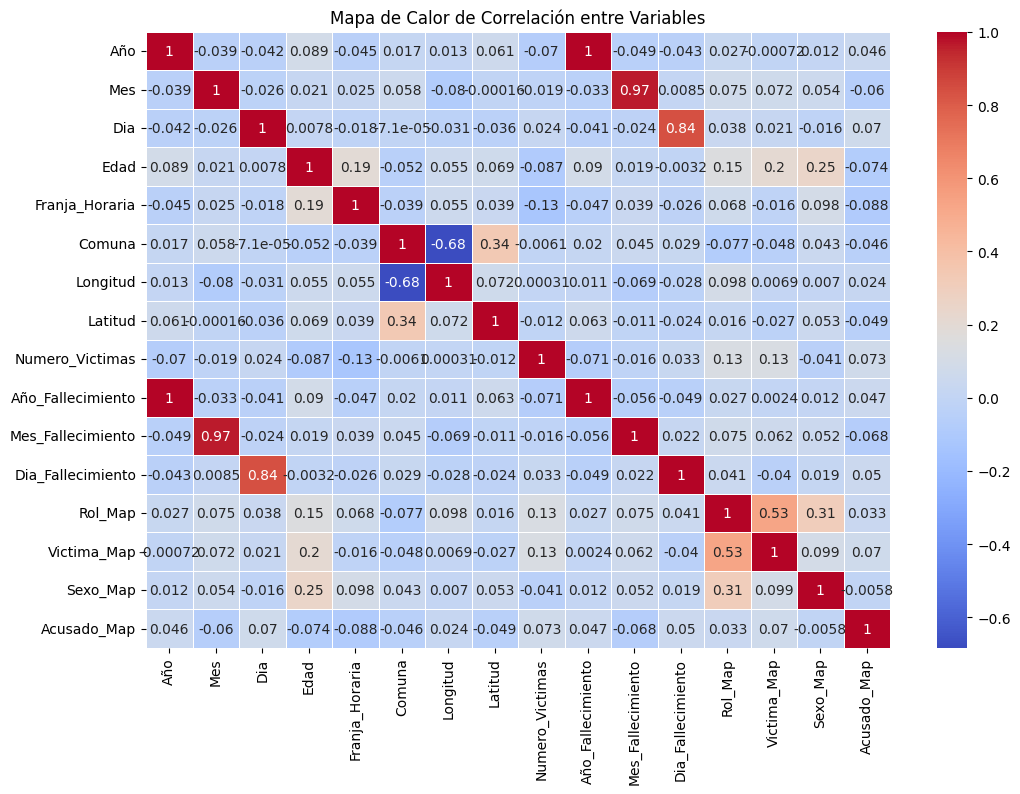

In [5]:
%matplotlib inline
df2 = df[['Año', 'Mes', 'Dia', 'Edad', 'Franja_Horaria', 'Comuna', 'Longitud', 'Latitud', 'Numero_Victimas', 'Año_Fallecimiento', 'Mes_Fallecimiento', 'Dia_Fallecimiento','Rol_Map', 'Victima_Map','Sexo_Map', 'Acusado_Map']]
df2
# Calcular la matriz de correlación
correlation_matrix = df2.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Personalizar el mapa de calor
plt.title('Mapa de Calor de Correlación entre Variables')
plt.show()

Como era de esperarse por el análisis previo, encontramos correlaciones altas entre las fechas del accidente y las fechas de fallecimiento, esto nos indica que las victimas mueren de forma inmediata o en los días siguientes al accidente de tránsito.

La víctima y el Rol también están correlacionados, indicándonos que el tipo de rol puede indicar el tipo de víctima, esto es claro pues alguien el rol de conductor puede ocasionar el accidente los tipos de victima siempre tienen la tendencia a ser los mismos. Por ejemplo, un conductor que atropella a un peatón o colisiona con una moto.

Como los participantes están compuestos por la víctima y el acusado estas variables están altamente correlacionadas (Pandas profiling).


### Analisis univariado, bivariado y multivariado 

### Distribución accidentes por año y por mes

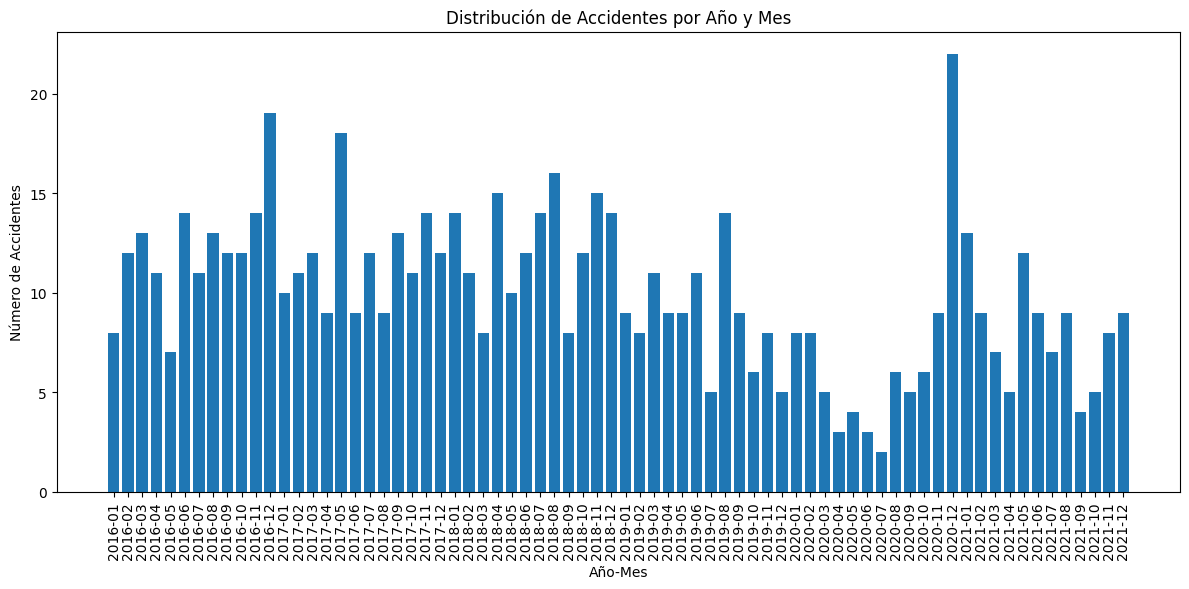

In [6]:
# Convertir las columnas de 'Año' y 'Mes' en formato de fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month

# Agrupar por año y mes y contar los accidentes
accidentes_por_mes = df.groupby(['Año', 'Mes']).size().reset_index(name='Accidentes')

# Crear un histograma
plt.figure(figsize=(12, 6))
plt.bar(accidentes_por_mes.index, accidentes_por_mes['Accidentes'])
plt.xlabel('Año-Mes')
plt.ylabel('Número de Accidentes')
plt.title('Distribución de Accidentes por Año y Mes')
plt.xticks(accidentes_por_mes.index, [f"{a}-{m:02d}" for a, m in zip(accidentes_por_mes['Año'], accidentes_por_mes['Mes'])], rotation=90)
plt.tight_layout()
plt.show()

Se observa una disminución en los accidentes comprendidos entre marzo de 2020 y el mes de Julio del mismo año, esto puede estar explicado por las cuarentenas relacionadas con el Código y las restricciones de circulación estipuladas por el gobierno en ese momento.

Los meses de diciembre para todos los anos implican picos de accidentes, sin embargo, el mes de diciembre del 2020 se ve un poco atípico por el gran número de accidentes, esto también podría deberse a la vuelta a la normalidad en la circulación y la salida masiva de personas a las vías públicas como el resultado de meses de confinamiento.


### Coincidencia Fecha de fallecimiento vs fecha de accidente

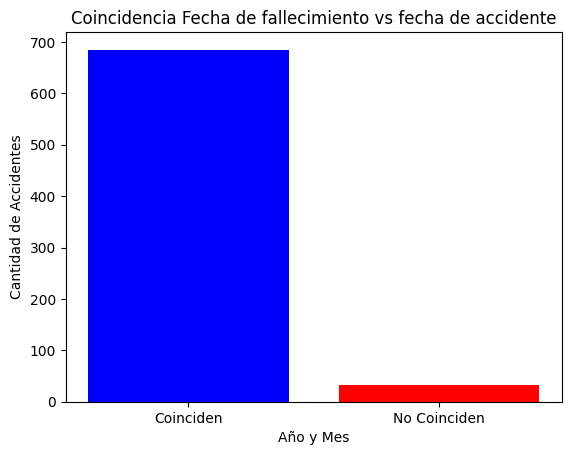

In [7]:
df['Coincide_Año_Mes_Fallecimiento'] = (df['Año'] == df['Año_Fallecimiento']) & (df['Mes'] == df['Mes_Fallecimiento'])

# Cuenta cuántos accidentes coinciden y cuántos no
coinciden = df['Coincide_Año_Mes_Fallecimiento'].sum()
no_coinciden = len(df) - coinciden

# Crea un gráfico de barras apiladas
plt.bar(['Coinciden', 'No Coinciden'], [coinciden, no_coinciden], color=['blue', 'red'])

# Agrega etiquetas y título al gráfico
plt.xlabel('Año y Mes')
plt.ylabel('Cantidad de Accidentes')
plt.title('Coincidencia Fecha de fallecimiento vs fecha de accidente')

# Muestra el gráfico
plt.show()

Como lo vimos en la matriz de correlación la fecha del accidente normalmente coincide con la fecha de fallecimiento, infiriéndose para la mayoría de los casos una muerte inmediata o en las horas siguientes.

### Muertes por mes

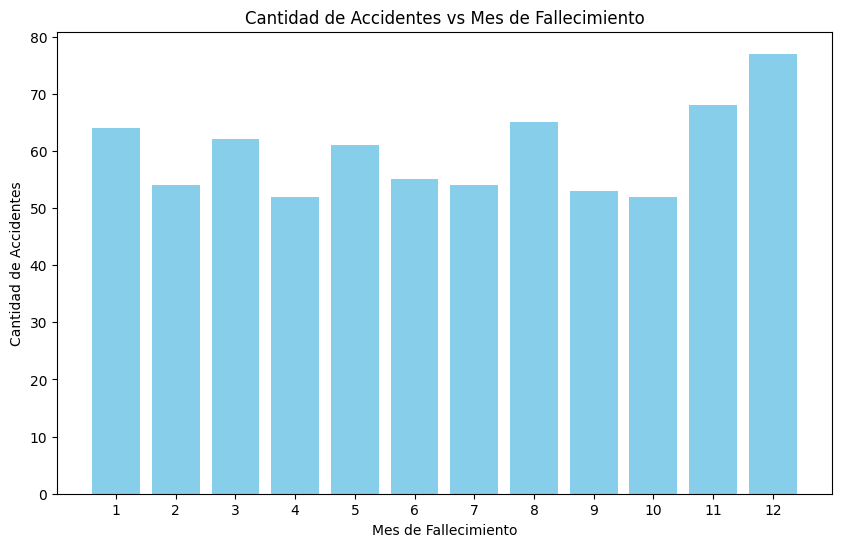

In [8]:
# Agrupamiento y conteo por mes de fallecimiento y ID
accidentes_por_mes = df.groupby('Mes_Fallecimiento')['ID'].count()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(accidentes_por_mes.index, accidentes_por_mes.values, color='skyblue')

# Agregar etiquetas y título al gráfico
plt.xlabel('Mes de Fallecimiento')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes vs Mes de Fallecimiento')

# Mostrar el gráfico
plt.xticks(accidentes_por_mes.index)
plt.show()

Los picos de muertes se dan en los meses de noviembre y diciembre. En nuestra grafica de accidentes por año mes pudimos observar que estos meses normalmente se disparan los accidentes fatales, por lo que no es de sorprenderse que se presente esta tendencia. Pareciera también estar relacionada con el verano argentino que se da entre diciembre y marzo.

### Outliers Victimas

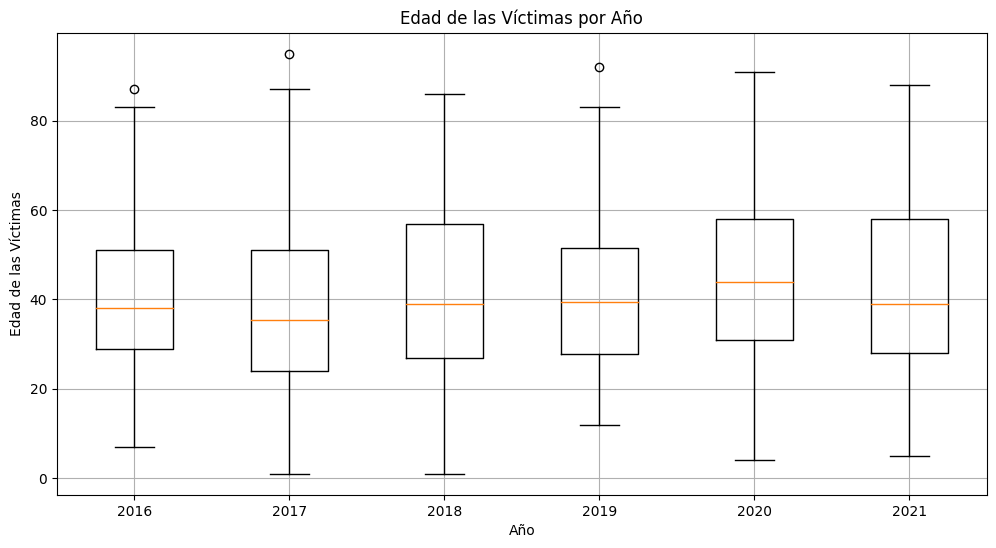

In [9]:
# Crear el boxplot
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Año'] == año]['Edad'] for año in df['Año'].unique()])
plt.xticks(range(1, len(df['Año'].unique()) + 1), df['Año'].unique())
plt.title('Edad de las Víctimas por Año')
plt.xlabel('Año')
plt.ylabel('Edad de las Víctimas')
plt.grid(True)
plt.show()

Con este grafico se busca identificar outlier o valores atípicos de las victimas por año. Se observa que la mediana no difiere mucho ano a ano lo que demuestra consistencia, de igual forma sucede con los percentiles 25% a 75% siendo el 25% aproximado a los 30 años y el 75% cercano a los 60. se identifican outliers en los años 2016, 2017 y 2019 sin embargo en cuestiones de edad no de alarmarse que haya habido víctimas fatales cercanas a los 90 años, aunque fuera de las estadísticas es totalmente comprensible.

### Victimas por categoría

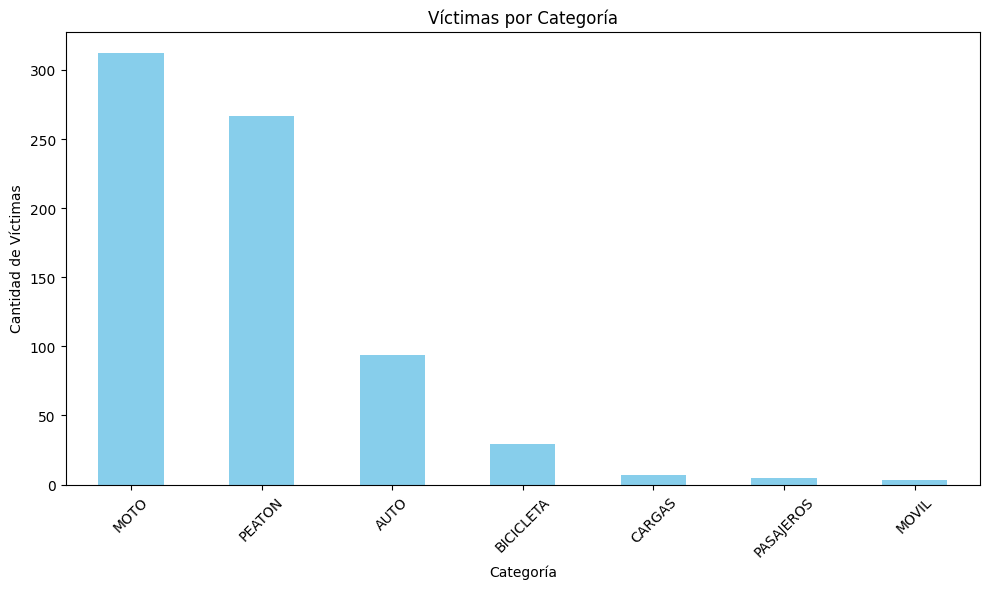

In [10]:
victimas_por_categoria = df['Victima'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
victimas_por_categoria.plot(kind='bar', color='skyblue')

# Agregar etiquetas y título al gráfico
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Víctimas')
plt.title('Víctimas por Categoría')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Las motos representan la mayoría de las víctimas fatales, esto es bastante común pues es un medio de transporte menos seguro que los autos y en los países subdesarrollados es por excelencia el medio de transporte a motor más utilizado.

Lo siguen los peatones y los autos. Se puede concluir que la mayoría de las víctimas son personas que usan sus medios de transporte particulares, mientras que el índice de accidentes y fatalidades en los medios de transporte público es mucho menor. Esto indica que los últimos son más seguros ya que ocupan la categoría más baja incluso siendo los que movilizan más personas por volumen en la ciudad.


### Outliers victimas por franja horaria

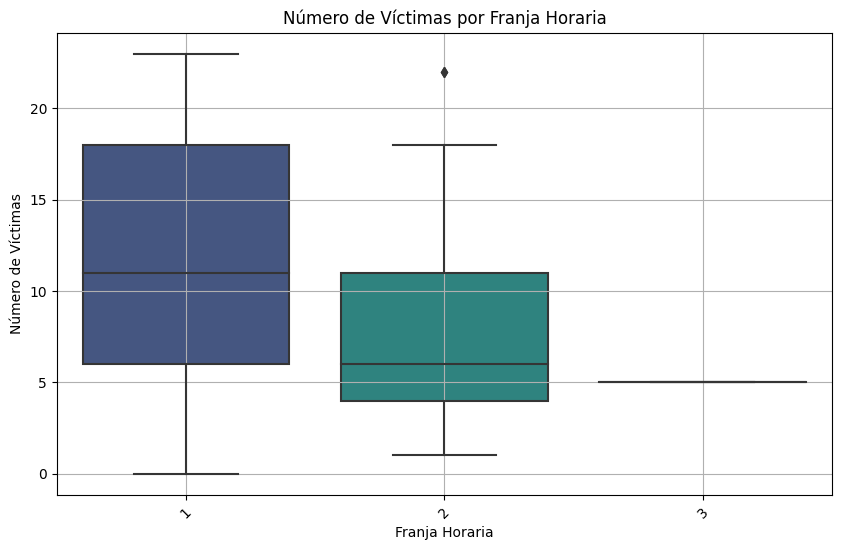

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Numero_Victimas', y='Franja_Horaria', data=df, palette='viridis')
plt.title('Número de Víctimas por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Número de Víctimas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Entre las 5am y las 9am se dan la mayoría de los accidentes fatales, esto coincide completamente con las horas pico de la mañana. Las horas de la tarde en un rango de 5pm a 7pm también evidencian gran accidentalidad, nuevamente esto puede ser explicado por el retorno de la mayoría de los trabajadores a su lugar de residencia. las primeras horas de la madrugada por el contrario son el rango de menor accidentalidad y fatalidad (12am a 3am). Particularmente se puede observar que la 1pm y las 3pm son horas con índices bajos, esto puede deberse a que no son horas pico de tráfico y las personas almuerzan en su lugar de trabajo.

# Outliers victimas por franja horaria por categoría

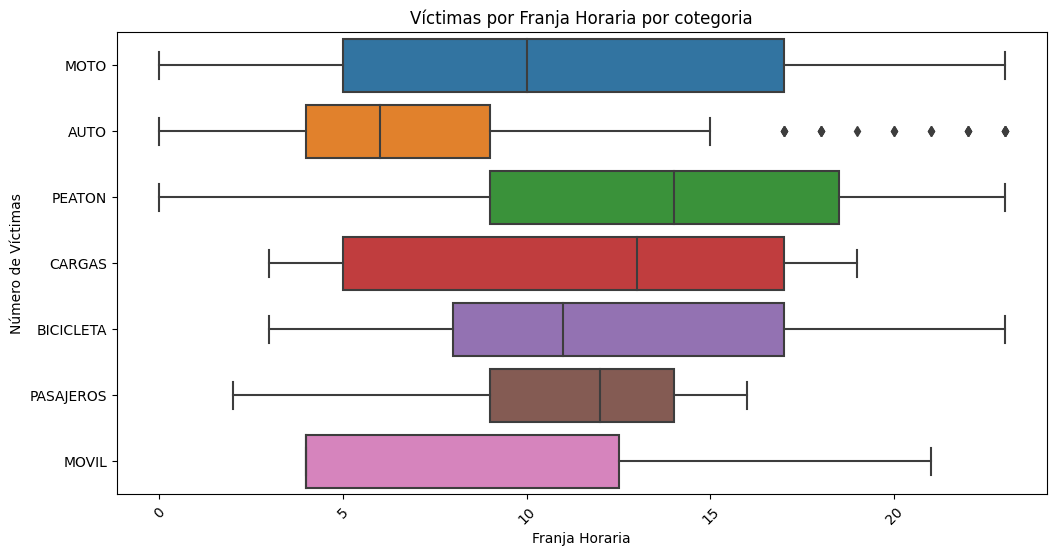

In [12]:
# Crear el boxplot
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
sns.boxplot(x='Franja_Horaria', y='Victima', data=df)

# Agregar título y etiquetas
plt.title('Víctimas por Franja Horaria por cotegoria')
plt.xlabel('Franja Horaria')
plt.ylabel('Número de Víctimas')

# Rotar etiquetas en el eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Ahora bien, si se analiza por categoría de victima los horarios de los accidentes difieren. Por ejemplo, para los Autos la mayoría de los accidentes se presentan entre las 5am y las 9am, hora pico de salida a la oficina, en las horas de la tarde a partir de las 3pm es extraño que haya una víctima fatal en Auto. Las motos tienen una dispersión más amplia en la franja horario y a pesar de que la mayoría de los accidentes suceden entre 5am a 4pm se puede ver que hay accidentes también a la madrugada y a altas horas de la noche, aunque claramente en menor medida.

Las Cargas se comportan parecido a las motos, sin embargo, dadas las restricciones de circulación los accidentes comienzan a las 4am y terminan a las 7pm.

Los peatones son un grupo que centra sus accidentes entre las 9am y las 6pm, horas en que normalmente se ven más peatones en la calle. Estos horarios podrían indicar que una parte importante de las víctimas son turistas.

Los móviles también tienen un comportamiento basado en los horarios de servicio. Aunque después del mediodía no son tan usuales los accidentes fatales donde estén involucrados como víctimas. 


### Victimas por año

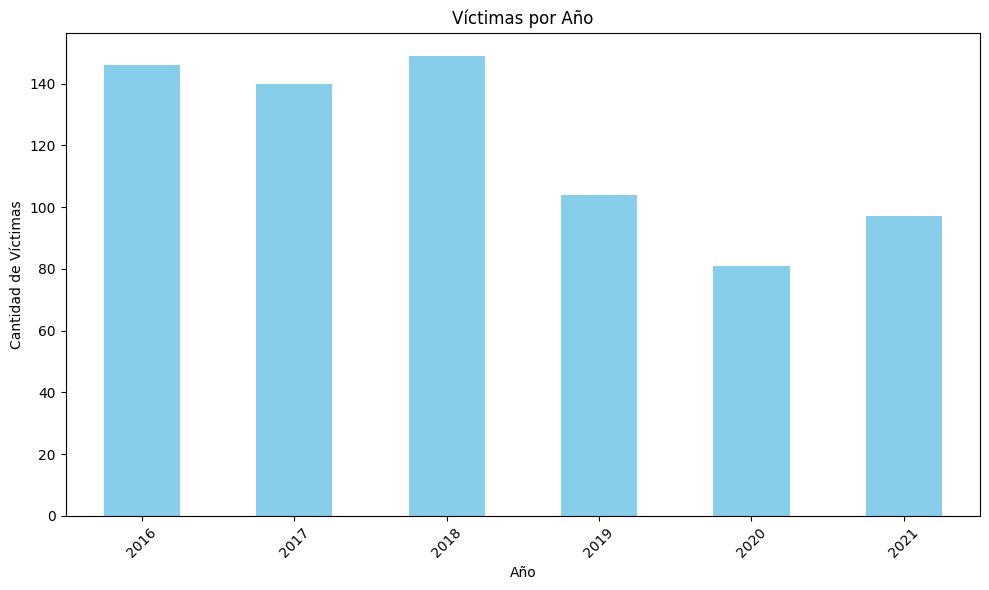

In [13]:
victimas_por_ano = df['Año'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
victimas_por_ano.plot(kind='bar', color='skyblue')

# Agregar etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Víctimas por Año')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se observa una tendencia decreciente, lo que indica que el número de accidentes fatales ha venido disminuyendo año a año desde el 2018. Es evidente que el 2020 está afectado por los meses de cuarentena, pero deberíamos esperar incluso resultados menores, sin embargo, como lo vimos anteriormente el mes de diciembre de ese año fue particularmente alto, siendo el pico más alto en la muestra. Sin embargo, si se toma como punto de partida el año 2.018, vemos que comparado con 2.021 este último ano registra un numero mucho menor de víctimas fatales, lo que indica que las estrategias tomadas por el gobierno en materia de transporte han dado resultados positivos.

### Outliers edad por tipo de sexo

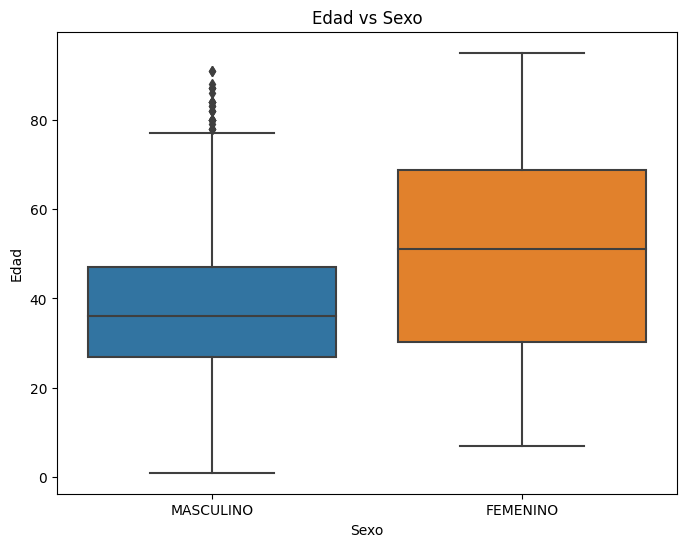

In [14]:
# Crear el boxplot
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
sns.boxplot(x='Sexo', y='Edad', data=df)

# Agregar título y etiquetas
plt.title('Edad vs Sexo')
plt.xlabel('Sexo')
plt.ylabel('Edad')

# Mostrar el gráfico
plt.show()

Masculino: Se puede observar que para el sexo masculino no es usual que se presenten accidentes por encima de los 80 años, sin embargo, una pequeña proporción de víctimas se encuentra por encima de los 80 años. de igual forma hay víctimas de este género cercanas a un ano, lo que indica que como acompañante o pasajeros estuvieron involucrados en un accidente fatal.

Femenino: Aunque no se identifican valores atípicos en las edades más altas, si se puede observar que los rangos de edades comunes para accidentes fatales en las mujeres llegan hasta los 70 años. En los hombres es aproximadamente 50 años. también se puede ver que las mujeres tienden a tener un accidente fatal a una edad más avanzada que los hombres.


### Victimas por sexo año

<Figure size 1200x800 with 0 Axes>

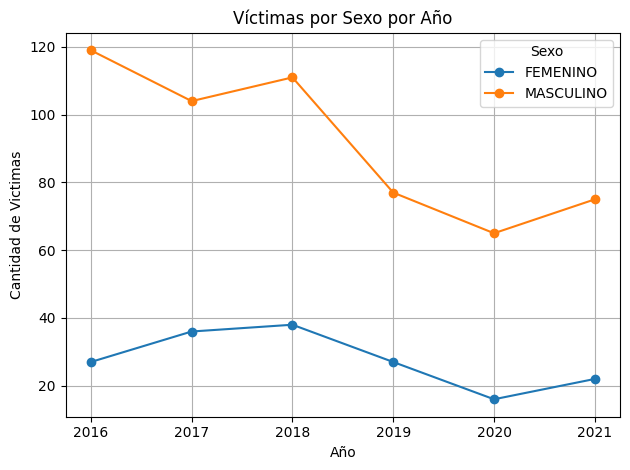

In [15]:
# Agrupamos anio y sexo
resumen_victimas = df.groupby(['Año', 'Sexo']).size().unstack().fillna(0)

# Crear un gráfico de líneas
plt.figure(figsize=(12, 8))
resumen_victimas.plot(kind='line', marker='o')

# Agregar etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad de Victimas')
plt.title('Víctimas por Sexo por Año')

# Mostrar el gráfico
plt.legend(title='Sexo')
plt.grid(True)
plt.tight_layout()
plt.show()

Aunque comparten la tendencia hay una gran diferencia en lo referente a cantidad de víctimas, siendo el sexo masculino el más afectado en las fatalidades. Desde 2018 sin embargo se observa una tendencia decreciente por fatalidades en ambos sexos, con una reducción destable de más de 40 víctimas comparando los años 2016 y 2021. Esto indica nuevamente que las acciones gubernamentales en esta materia han surtido efecto.

### Proporción de victimas por sexo

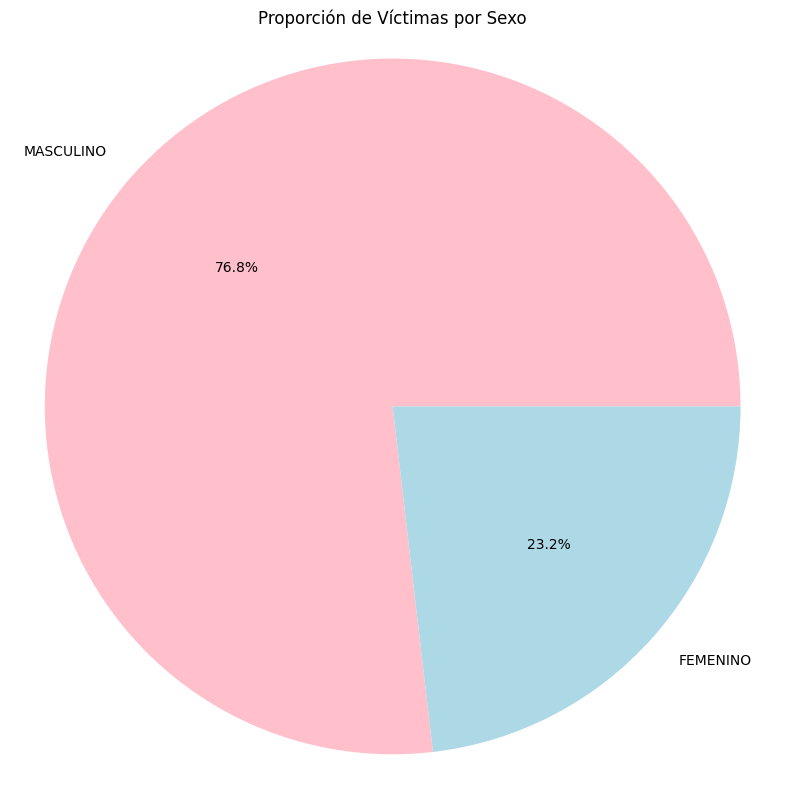

In [16]:
# Contar la cantidad de víctimas por sexo
victimas_por_sexo = df['Sexo'].value_counts()

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(victimas_por_sexo, labels=victimas_por_sexo.index, autopct='%1.1f%%', colors=['pink', 'lightblue'])

# Agregar título al gráfico
plt.title('Proporción de Víctimas por Sexo')

# Mostrar el gráfico
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.tight_layout()
plt.show()

La distribución de accidentes es 76.8% Hombre y 23.2% Femenino. Siendo el primer genero el más afectado por fatalidades en accidentes fatales de tránsito.

### Victimas por comuna por categoría

<Figure size 1200x800 with 0 Axes>

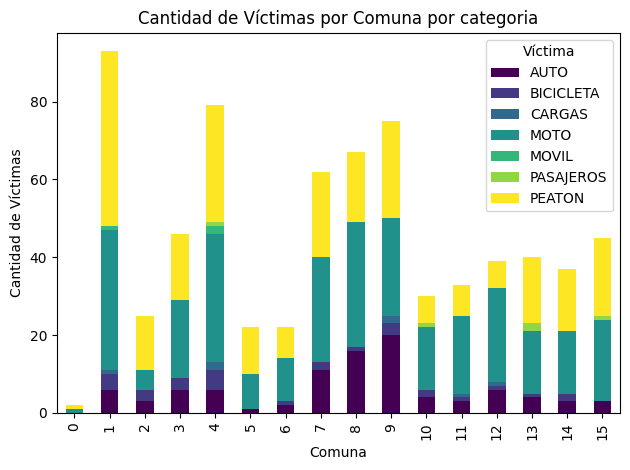

In [17]:
# Crear una tabla de contingencia entre las columnas 'Comuna' y 'Victima'
table = pd.crosstab(df['Comuna'], df['Victima'])

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
table.plot(kind='bar', stacked=True, colormap='viridis')

# Agregar etiquetas y título al gráfico
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Comuna por categoria')

# Mostrar el gráfico
plt.legend(title='Víctima', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

La distribución por comuna y tipo de victima indica que hay una tendencia clara entre el sitio turístico y de trabajo, peatones y fatalidades. Mientras que las victimas motociclistas están distribuidas por todas las comunas. Los autos presentan mayor incidencia como victimas en las columnas 7, 8 y 9.

### Victimas por comuna por sexo

<Figure size 1200x800 with 0 Axes>

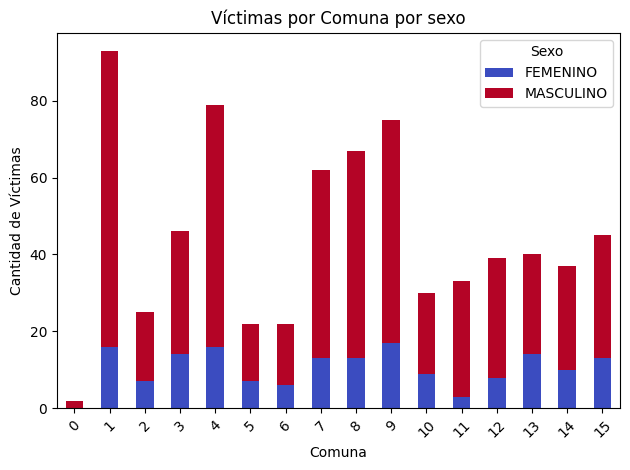

In [18]:
# Agrupacion por comuna y sexo
resumen_victimas = df.groupby(['Comuna', 'Sexo']).size().unstack().fillna(0)

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 8))
resumen_victimas.plot(kind='bar', stacked=True, colormap='coolwarm')

# Agregar etiquetas y título al gráfico
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Víctimas')
plt.title('Víctimas por Comuna por sexo')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

La mayoría de las víctimas son masculinas en todas las comunas. Es evidentes que la comuna 1 es la que presenta más fatalidades, esto se explica pues es el centro administrativo de la ciudad y el punto con mayor cantidad de destinos turísticos por lo que puede decirse que es la comuna de buenos Aires con el tráfico más pesado. Las comunas con menor índice de accidentalidad son tradicionalmente lugares de vivienda en su mayoría ubicadas en la periferia.

### Relación acusado y víctima

<Figure size 1200x800 with 0 Axes>

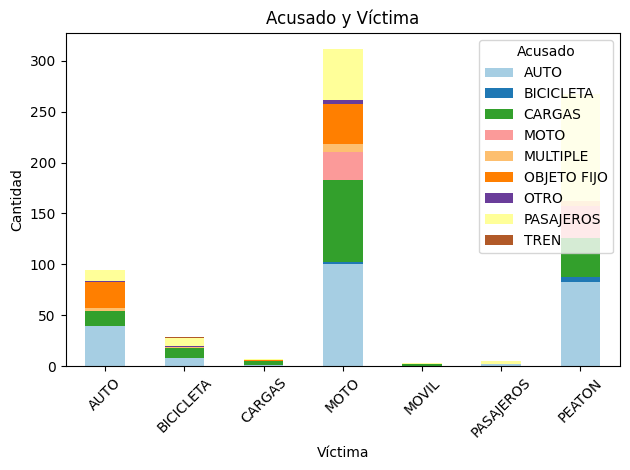

In [19]:
# Tabla Victima y acusado
table = pd.crosstab(df['Victima'], df['Acusado'])

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 8))
table.plot(kind='bar', stacked=True, colormap='Paired')

# Agregar etiquetas y título al gráfico
plt.xlabel('Víctima')
plt.ylabel('Cantidad')
plt.title('Acusado y Víctima')

# Mostrar el gráfico
plt.legend(title='Acusado', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Este grafico es bien interesante:

a. Se puede concluir que los causantes de los accidentes sin importar la víctima en su mayoría son los autos particulares.
b. Las motos y los peatones con en su mayoría víctimas de los Autos.
c. Los vehículos de Carga son la segunda categoría de Acusados que más fatalidades causan, en su mayoría a motociclistas y peatones.
d. Los Peatones nunca tienen la responsabilidad de los accidentes.
e. Hay gran número de fatalidades entre motos y entre motos y objetos fijos.
f. Es particular observar que los pasajeros sean acusados por los accidentes donde las víctimas son motos y peatones.
g. El mayor número de víctimas son motos.


### Acusado por año / Categoría

<Figure size 1200x600 with 0 Axes>

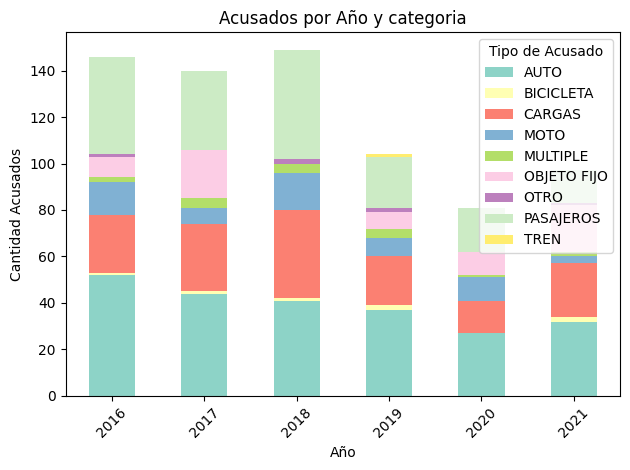

In [20]:
# Agrupar el DataFrame por año y tipo de acusado, y contar la cantidad de casos en cada grupo
acusados_por_anio_tipo = df.groupby(['Año', 'Acusado'])['ID'].count().unstack()

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
acusados_por_anio_tipo.plot(kind='bar', stacked=True, colormap='Set3')

# Agregar etiquetas y título al gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad Acusados')
plt.title('Acusados por Año y categoria')

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.legend(title='Tipo de Acusado')
plt.tight_layout()
plt.show()

A pesar de lo que podría pensarse las motos no son las causantes de la mayoría de los accidentes fatales y se puede ver una tendencia estable año tras año. Los pasajeros vienen disminuyendo como acusados de los accidentes. Lo que es claro es que los acusados son en su mayoría los autos como lo habíamos visto anteriormente. 

## Conclusiones generales EDA


1. Las variables más relacionadas son las fechas del accidente y las fechas de fallecimiento, de esta correlación se puede inferir que la mayoría de los accidentes causan una muerte inmediata o en las siguientes horas o días.

2. Los roles y las victimas también se relacionan esto pues el rol que asume una persona en un accidente de tránsito se puede directamente relacionar con la víctima del accidente.

3. Las muertes por año y mes nos indican que hay ciertos meses del año donde se dan más accidentes fatales, estos son noviembre, diciembre y enero. El análisis de las muertes por mes corrobora esta conclusión. Otra inferencia que podemos hacer es que durante el año 2.020 se evidencian que en los meses más difíciles de la Pandemia hubo una reducción significativa de las fatalidades. A partir del 2.018 se ve que hay una tendencia clara a la disminución de accidentes fatales, lo que indica que las medidas tomadas por las autoridades han sido efectivas.

5. La mayoría de las víctimas son de sexo masculino y son motociclistas. De igual forma son los autos particulares los más acusados como responsables del homicidio.

6. En cuanto a la edad se evidencia que las victimas hombres tienen un rango de edad menos disperso y no es común ver víctimas de más de 80 años. Las mujeres tienen accidentes fatales a una edad más tardía y es más común que se accidenten mujeres en edades de 80 años en adelante en comparación con los hombres.

7. Las franjas horarias y las victimas nos indican que la mayoría de los accidentes fatales se dan en la hora pico de la mañana, hora en que la mayoría de las personas se desplazan a sus trabajos. Por categoría se ve que las motos son los tipos de victima que se accidentan en un rango más amplio de horas.

8. Las fatalidades por comuna se dan principalmente en aquellas que son altamente turísticas o concentran la mayoría de la población trabajadora. Las motos mantienen una tendencia de fatalidad en todas las comunas, sin embargo, los peatones son víctimas en aquellas turísticas o centros de trabajo.

9. Las victimas con mayor incidencia son las motos y los peatones. Frente a los acusados que son los autos particulares, los carros de carga y los pasajeros.

10. A pesar de que se dan outliers o datos atípicos en términos de la edad, las franjas horarias y el número de víctimas cuando se analizan a razón de la lógica no son casos que necesiten ser revisados o contrastados.
